<a href="https://colab.research.google.com/github/bsong75/brendensong.github.io/blob/main/9_a_Keras_MNIST_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [10]:
mnist =tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

#model
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())  # numpy array to tensors
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2671 - accuracy: 0.9215
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1081 - accuracy: 0.9660
Epoch 3/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0729 - accuracy: 0.9769


In [11]:
#validation loss
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.0901 - accuracy: 0.9713
0.09008172899484634 0.9713000059127808


In [14]:
model.save('epic_num_reader.model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: epic_num_reader.model/assets


In [16]:
new_model = tf.keras.models.load_model('epic_num_reader.model')

In [17]:
predictions = new_model.predict([x_test])

In [18]:
print(predictions)

[[1.10126193e-08 1.07736774e-07 8.59534680e-07 ... 9.99998450e-01
  1.84376969e-09 6.25085335e-08]
 [7.87960198e-06 1.96879453e-04 9.99202073e-01 ... 6.68723530e-08
  2.52817267e-06 2.62516551e-08]
 [1.79486193e-07 9.99467313e-01 5.87403792e-06 ... 1.04215076e-04
  1.36057482e-04 2.36906217e-05]
 ...
 [3.34022338e-10 9.43735543e-08 1.22392372e-08 ... 5.05867210e-05
  9.29306850e-07 2.15912951e-04]
 [9.06738535e-07 4.68572665e-07 9.79083339e-08 ... 1.96891915e-06
  1.14196970e-04 2.39140636e-08]
 [6.99035445e-06 2.47448035e-08 3.27617414e-07 ... 2.28024066e-09
  5.70200198e-09 7.94025901e-10]]


In [20]:
import numpy as np
print(np.argmax(predictions[0]))

7


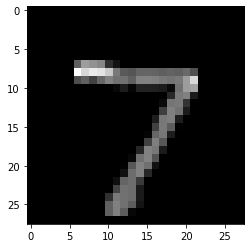

In [22]:
plt.imshow(x_test[0], cmap='gray')

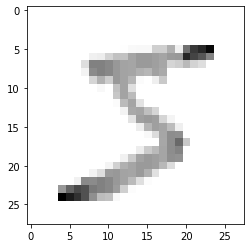

In [8]:
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()


#dataset = MNIST(root='/content/sample_data/mnist_test.csv', download=True, transform=ToTensor())